In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
#from itertools import permutations
from itertools import product
from  matplotlib.ticker import PercentFormatter

In [2]:
#Read in data
filepath = "C:/Users/seans/Desktop/QTW/Case Study 14 Misc & deployment/final_project.csv"
data = pd.read_csv(filepath,)
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

In [4]:
data.shape

(160000, 51)

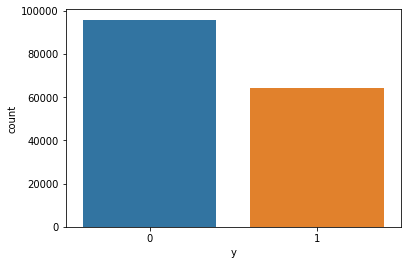

In [5]:
#Examine target variable
target_var = 'y'

sns.countplot(data[target_var])

In [6]:
# create a target object for EDA
data['y_obj'] = data['y'].astype('object')

In [7]:
data.head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x42,x43,x44,x45,x46,x47,x48,x49,y,y_obj
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1
5,-0.226706,11.350364,10.831367,5.182092,-2.236454,10.716248,15.747993,-15.900329,-0.178002,10.901306,...,6.402343,-2.064860,0.923879,0.331452,19.172365,5.752749,-2.609553,-20.320179,0,0
6,-0.431246,-0.974762,-7.412661,-0.930500,-1.265166,14.265374,-10.777451,5.523324,-11.757423,-1.932222,...,-7.779833,-1.153986,-1.081095,-0.538983,1.573406,2.102627,-2.966103,4.604337,1,1
7,-0.135071,8.524648,-6.731169,-13.374530,-0.079429,-9.511618,-9.786614,-11.663750,8.783823,-0.904801,...,-3.711105,-3.134008,-5.805255,0.966762,6.639034,6.258786,1.272556,13.186184,1,1
8,0.026694,-5.770476,0.774836,4.718855,4.816484,9.501880,1.126553,25.186840,4.650334,11.786198,...,0.330604,-2.015631,2.219910,0.533815,-2.627660,0.182319,3.140230,14.495677,0,0
9,-0.349073,3.334116,-3.355872,-0.796302,-0.900425,-7.620448,-4.879186,-16.972020,10.894596,9.426504,...,-0.675888,-2.560935,1.326146,0.444997,-20.942887,-3.141996,-1.608473,7.169219,1,1


In [8]:
#Separate numeric and categorical variables
num_vars = data.columns[data.dtypes != 'object']
cat_vars = data.columns[data.dtypes == 'object']

<span style="color:blue">
    
### Summary Statistics and Cardinality 

In [9]:
#Continuous Variables
data[num_vars].describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [10]:
#Categorical Variables
data[cat_vars].nunique()

x24           3
x29          12
x30           5
x32          12
x37      129198
y_obj         2
dtype: int64

In [11]:
data[cat_vars]

,x24,x29,x30,x32,x37,y_obj
0,euorpe,July,tuesday,0.0%,$1313.96,0
1,asia,Aug,wednesday,-0.02%,$1962.78,0
2,asia,July,wednesday,-0.01%,$430.47,0
3,asia,July,wednesday,0.01%,$-2366.29,0
4,asia,July,tuesday,0.01%,$-620.66,1
...,...,...,...,...,...,...
159995,asia,Aug,wednesday,0.0%,$-891.96,1
159996,asia,May,wednesday,-0.01%,$1588.65,0
159997,asia,Jun,wednesday,-0.0%,$687.46,1
159998,asia,May,wednesday,-0.02%,$439.21,0


##### x32 and x37 should be continuous.  Need to remove the percent and dollar sign

In [12]:
#lstrip() and rstrip(): https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv

#remove percent sign and convert to float
data['x32'] = data['x32'].str.rstrip('%').astype('float') / 100.0

#remove dollar sign and convert to float
data['x37'] = data['x37'].str.lstrip('$').astype('float')



In [13]:
#redeclare num/cat columns
#Separate numeric and categorical variables
num_vars = data.columns[data.dtypes != 'object']
cat_vars = data.columns[data.dtypes == 'object']

In [14]:
data[cat_vars].head()

,x24,x29,x30,y_obj
0,euorpe,July,tuesday,0
1,asia,Aug,wednesday,0
2,asia,July,wednesday,0
3,asia,July,wednesday,0
4,asia,July,tuesday,1


In [15]:
#Percentage of missing numeric values
data[num_vars].isnull().sum().sort_values(ascending=False)/len(data)

x23    0.000294
x10    0.000269
x33    0.000256
x34    0.000256
x41    0.000250
x18    0.000250
x44    0.000250
x31    0.000244
x2     0.000237
x20    0.000237
x43    0.000231
x47    0.000231
x5     0.000231
x3     0.000231
x26    0.000225
x40    0.000225
x12    0.000225
x28    0.000219
x19    0.000219
x15    0.000219
x14    0.000212
x49    0.000200
x48    0.000200
x38    0.000194
x32    0.000194
x13    0.000194
x46    0.000194
x27    0.000188
x11    0.000188
x35    0.000188
x9     0.000188
x21    0.000181
x45    0.000181
x17    0.000169
x36    0.000169
x22    0.000169
x7     0.000169
x6     0.000162
x4     0.000162
x0     0.000162
x16    0.000162
x42    0.000162
x1     0.000156
x37    0.000144
x39    0.000144
x25    0.000138
x8     0.000131
y      0.000000
dtype: float64

In [16]:
#Percentage of missing categorical values
data[cat_vars].isnull().sum().sort_values(ascending=False)/len(data)

x30      0.000188
x29      0.000188
x24      0.000175
y_obj    0.000000
dtype: float64

<BarContainer object of 52 artists>

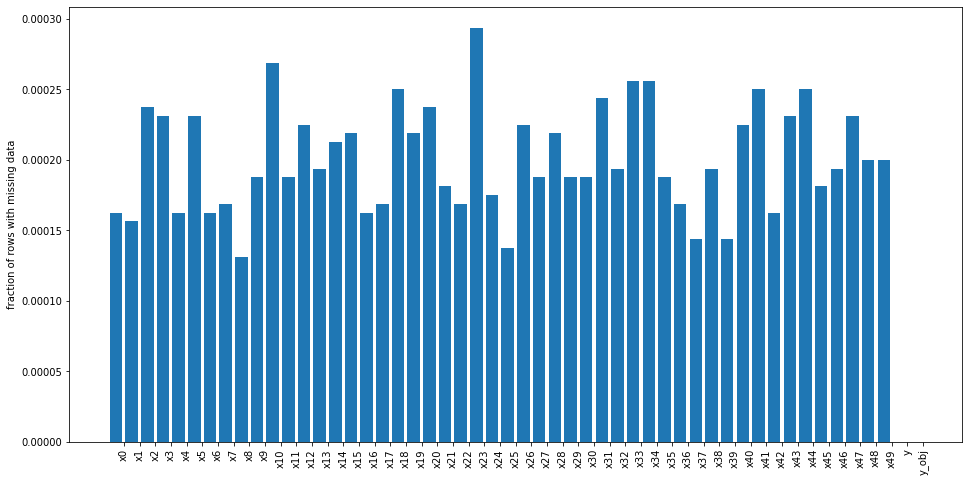

In [17]:
#full picture
null_counts = data.isnull().sum()/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

Since the fraction is such a small part of our total observations, we can drop missing values

In [18]:
#Drop observations with missing values
data = data.dropna()

In [19]:
print(data.isnull().sum())

x0       0
x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
x8       0
x9       0
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
x16      0
x17      0
x18      0
x19      0
x20      0
x21      0
x22      0
x23      0
x24      0
x25      0
x26      0
x27      0
x28      0
x29      0
x30      0
x31      0
x32      0
x33      0
x34      0
x35      0
x36      0
x37      0
x38      0
x39      0
x40      0
x41      0
x42      0
x43      0
x44      0
x45      0
x46      0
x47      0
x48      0
x49      0
y        0
y_obj    0
dtype: int64


<span style="color:blue">
 
### Continuous Variables - EDA

C:\Users\seans\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\seans\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\seans\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\seans\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001381AC1CA08>,
      dtype=object)

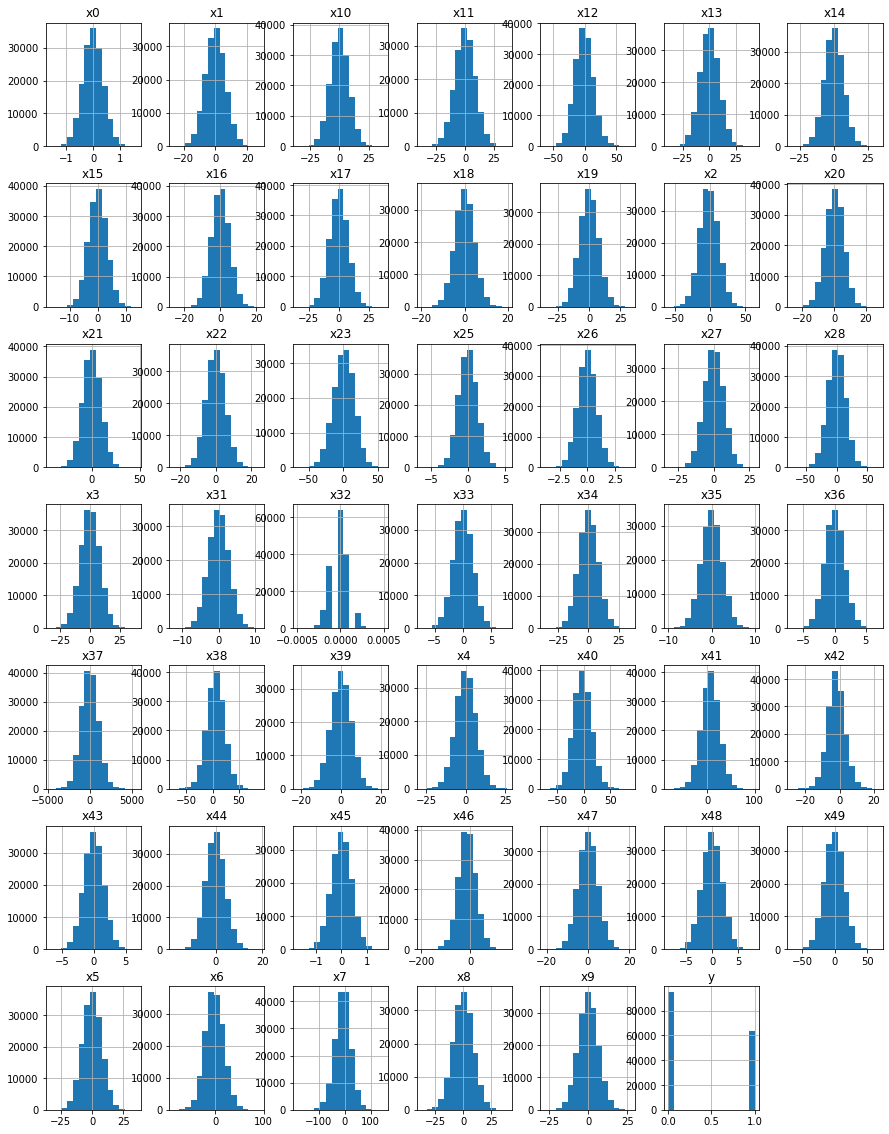

In [20]:
# Distributions of continuous variables
data[num_vars].hist(bins=15, figsize=(15,20))

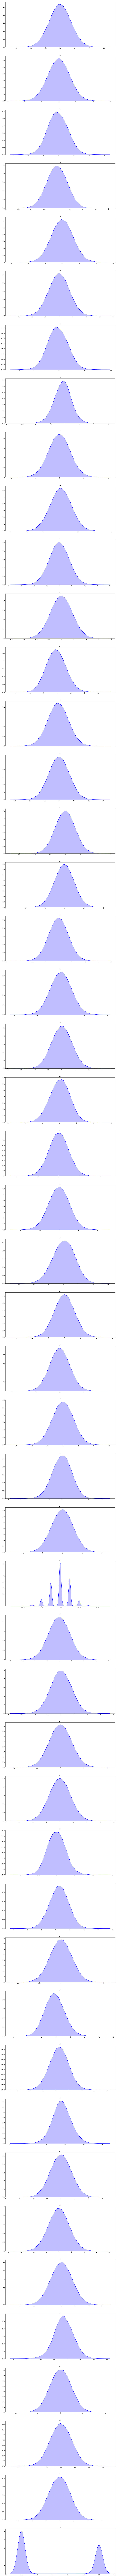

In [21]:
#KDE plots for continuous variables

#https://seaborn.pydata.org/generated/seaborn.kdeplot.html
#continous_feat_df = continous_feat_jitter[continous_features]
n=len(data[num_vars].columns)

fig,ax = plt.subplots(n,1, figsize=(20,n*10), sharex=False)
for i in range(n):
    plt.sca(ax[i])
    col = data[num_vars].columns[i]
    sns.kdeplot(data[num_vars][col].values, shade=True, legend = True, color="b").set_title(col)

In [22]:
### WARNING: This takes a very, very long time to run.

# Pairplots of continuous variables
#sns.pairplot(data[num_vars],hue = 'y', height=2)

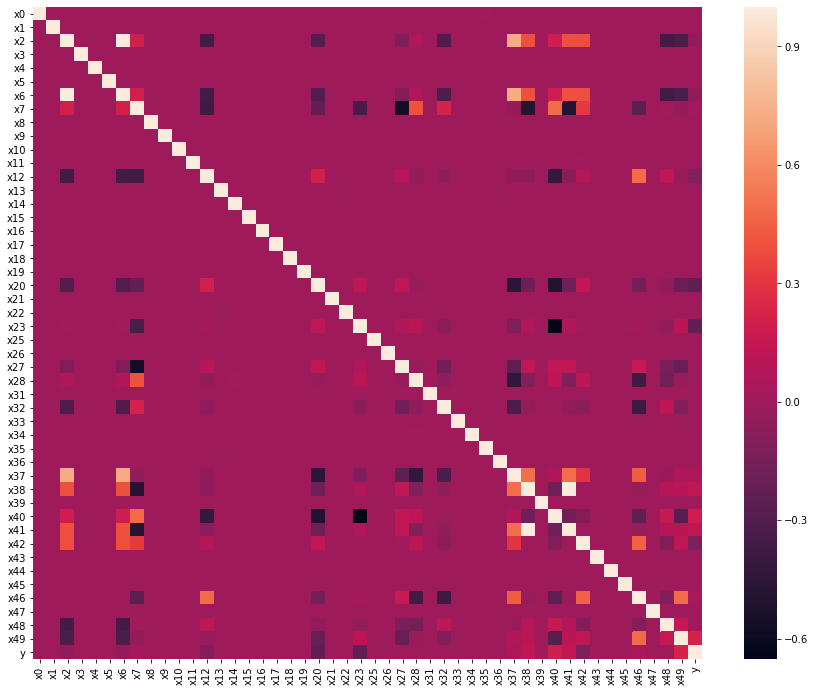

In [23]:
# Correlation Heatmap
plt.rcParams['figure.figsize'] = [15,12]
sns.heatmap(data[num_vars].corr(), annot = False)

It looks like x6 and x2 are highly correlated, as well as x41 and x38

<span style="color:blue">
    
### Preprocess continuous data

In [24]:
data_num = data[num_vars].drop(['y'], axis=1)

In [25]:
data_num.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742


In [26]:
scaled_num = StandardScaler().fit_transform(data_num.values)

In [27]:
#data_num_scaled = pd.DataFrame(scaled_num, index=data_num.index, columns=data_num.columns)

data_num_scaled = data_num

In [28]:
data_num_scaled.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742


<span style="color:blue">
    
    
### Categorical data - EDA

In [29]:
data[cat_vars].head()

,x24,x29,x30,y_obj
0,euorpe,July,tuesday,0
1,asia,Aug,wednesday,0
2,asia,July,wednesday,0
3,asia,July,wednesday,0
4,asia,July,tuesday,1


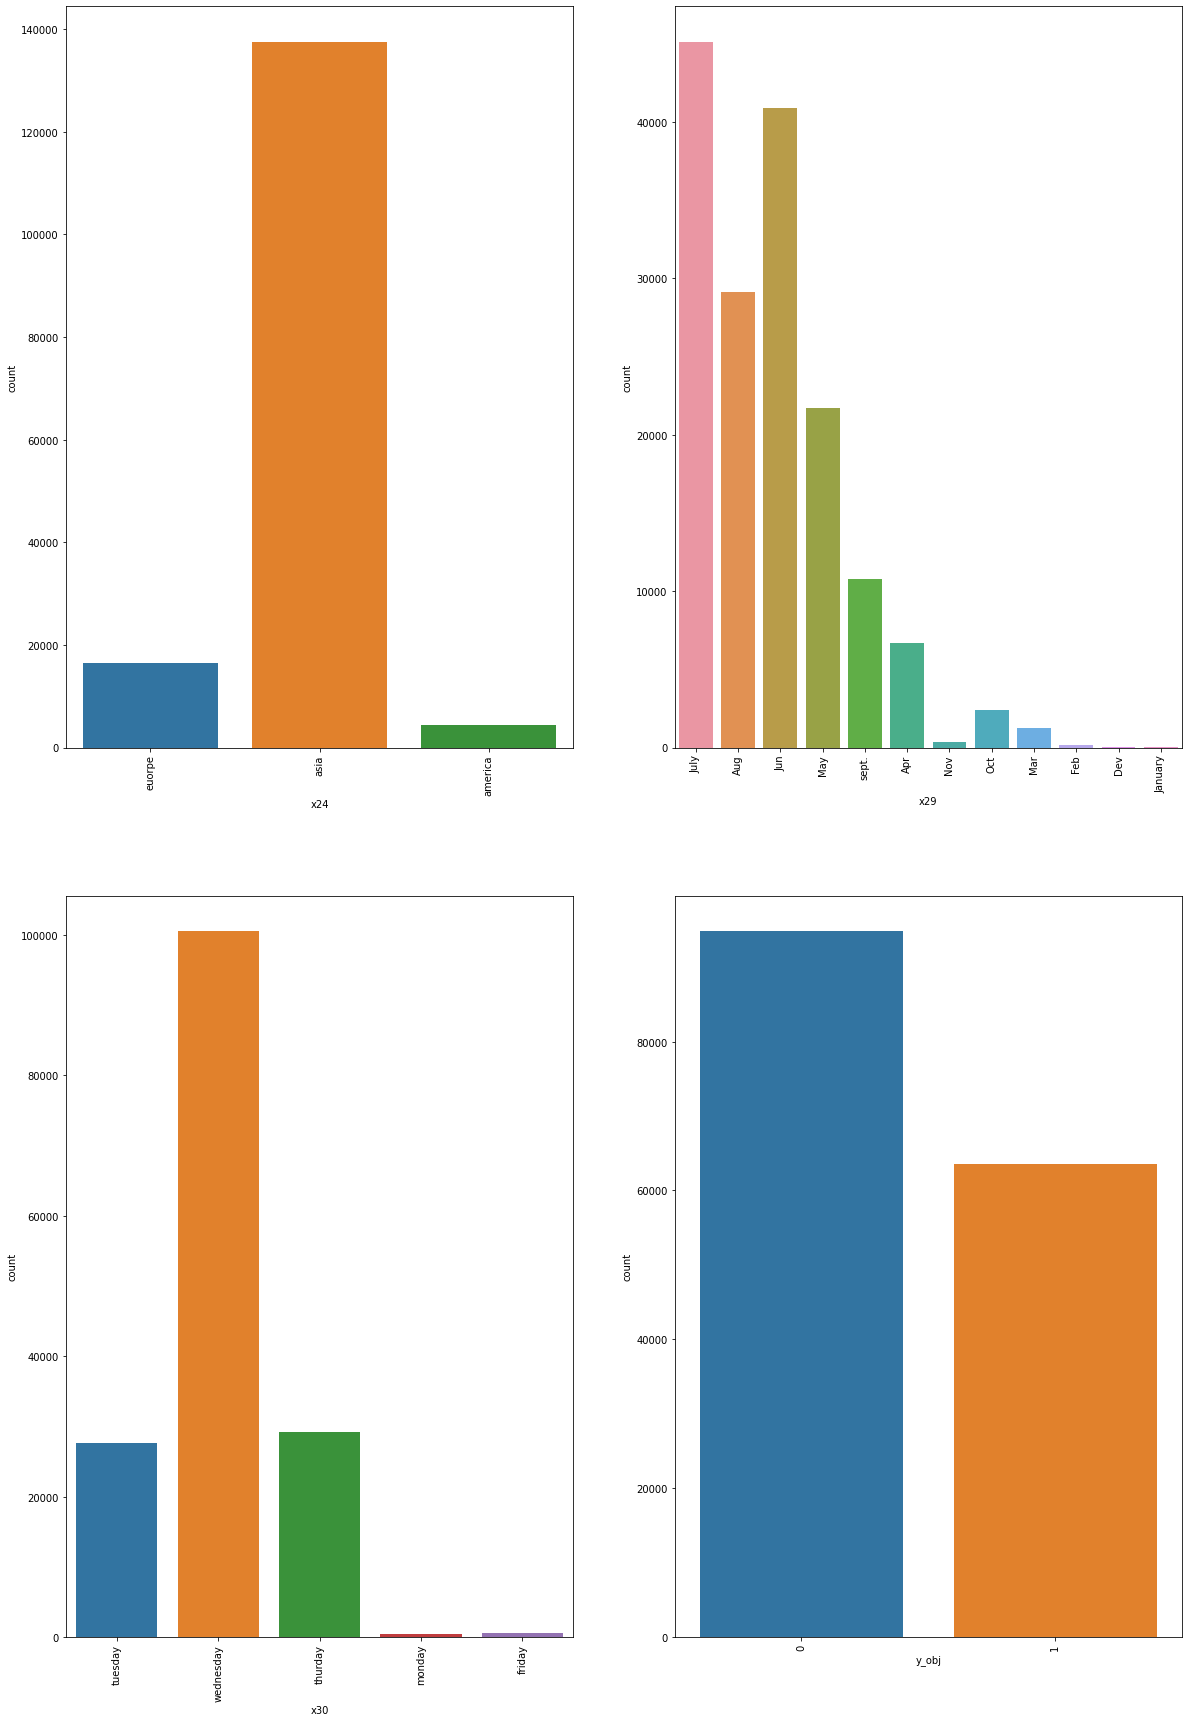

In [30]:
fig, ax=plt.subplots(2, 2, figsize=(20, 30))
for attribute, subplot in zip(data[cat_vars], ax.flatten()):
    sns.countplot(data[attribute], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

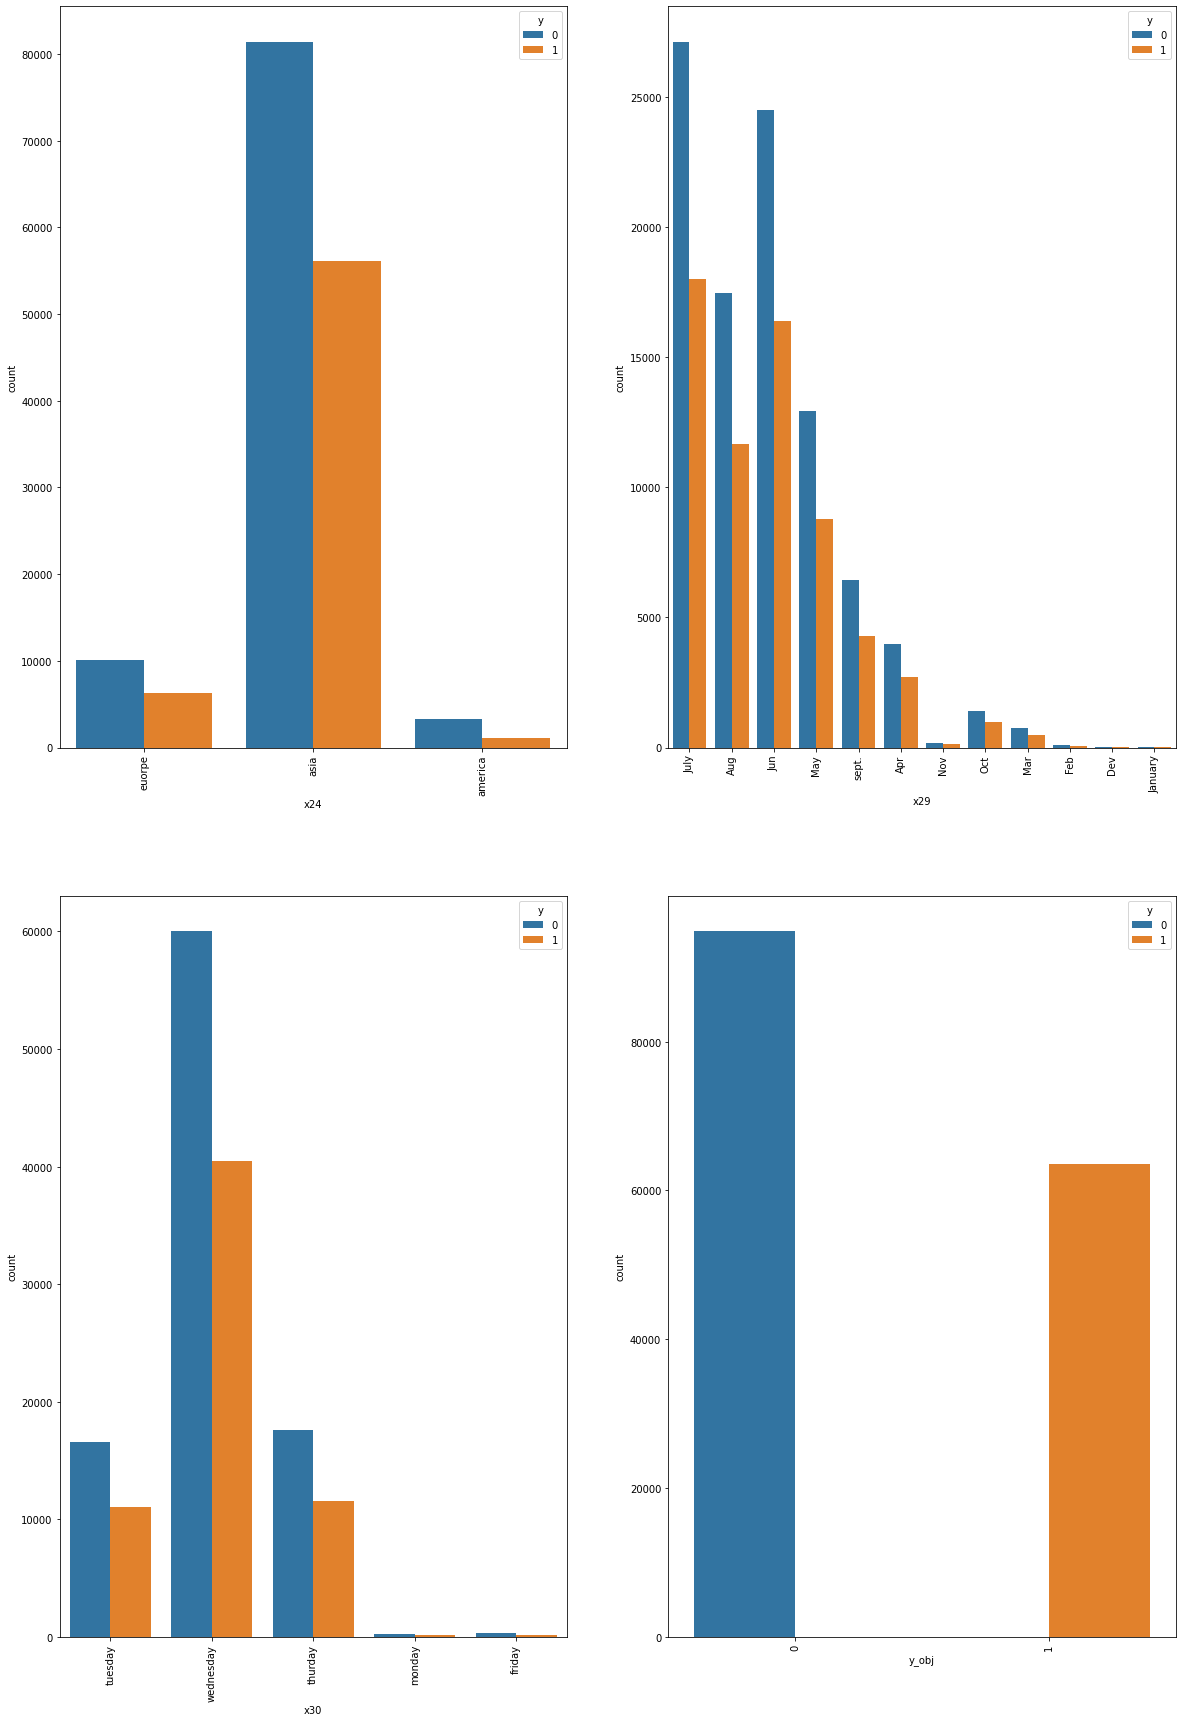

In [31]:
# Categorical count plots 
fig, ax=plt.subplots(int(len(data[cat_vars].columns)/2), 2, figsize=(20, 30))
for attribute, subplot in zip(data[cat_vars], ax.flatten()):
    sns.countplot(data[attribute], ax=subplot, hue=data[target_var])
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<span style="color:blue">
    
    
### Preprocess categorical data/create final dataset

In [32]:
#OneHotEncoding for categorical features
data2 = data.copy() 
datafinal = data_num_scaled
for i in list(data2[cat_vars].columns)[:-1]:
    datafinal = pd.concat([datafinal,pd.get_dummies(data2[i], prefix=i)], axis=1)
    #print(i)

<span style="color:blue">
    
### Add target and check dataset

In [33]:
#Add target variable
datafinal = pd.concat([datafinal, data['y']], axis=1)

In [34]:
print(list(datafinal.columns))

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x24_america', 'x24_asia', 'x24_euorpe', 'x29_Apr', 'x29_Aug', 'x29_Dev', 'x29_Feb', 'x29_January', 'x29_July', 'x29_Jun', 'x29_Mar', 'x29_May', 'x29_Nov', 'x29_Oct', 'x29_sept.', 'x30_friday', 'x30_monday', 'x30_thurday', 'x30_tuesday', 'x30_wednesday', 'y']


In [35]:
datafinal.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,1,0,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,1,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,1,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,1,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,1,0,1


In [36]:
datafinal.shape

(158392, 68)

In [37]:
#save output file
#datafinal.to_csv("preprocessed_data_test20210331.csv", sep=',')

<span style="color:blue">
    
## Test some classifiers

In [38]:
#Run various classifiers on data

#change to array
data_m = np.asarray(datafinal)

#Define Target
#target = data_m[:,-1]

#Drop target
#data_m = np.delete(data_m, -1, 1)

In [39]:
data_m.shape

(158392, 68)

In [40]:
#Remove 30% of data for holdout test
from sklearn.model_selection import train_test_split 

data_m_train, data_m_test = train_test_split(data_m, test_size=0.30, random_state = 2, stratify=data_m[:,-1])
print(data_m_train.shape)
print(data_m_test.shape)

(110874, 68)
(47518, 68)


In [41]:
#define training and testing target
data_m_train_target = data_m_train[:,-1]
data_m_test_target = data_m_test[:,-1]

#drp target column from training and testing sets
data_m_train = np.delete(data_m_train, -1, 1)
data_m_test = np.delete(data_m_test, -1, 1)

print(data_m_train_target.shape)
print(data_m_test_target.shape)
print(data_m_train.shape)
print(data_m_test.shape)

(110874,)
(47518,)
(110874, 67)
(47518, 67)


In [42]:
#Split between data and target; state the number of folds for CV
M = data_m_train
L = data_m_train_target
n_folds = 4
data = (M, L, n_folds)

In [43]:
#######################            Models     #############################           
models = [RandomForestClassifier, LogisticRegression, HistGradientBoostingClassifier, GaussianNB]

#######################    Hyperparameter Input     #############################
hypers = {'RandomForestClassifier': 
          {'n_estimators': [50, 100], 
           'criterion': ['entropy'], 
           'min_samples_split': [6, 12],
           'min_samples_leaf': [5],
           'random_state': [11]},
          'LogisticRegression': 
          {'penalty': ['l2'],
           'C': [1, 0.5, 0.25],
           'random_state': [11],
           'solver': ['lbfgs'],
           'max_iter': [300],
           'n_jobs': [-1]},
          'HistGradientBoostingClassifier': 
          {'loss': ['binary_crossentropy'],
           'learning_rate': [1, 0.75, 0.5, .1],
           'max_iter': [200],
           'min_samples_leaf': [20,40],
          'random_state': [11]},
          'GaussianNB':
          {'priors': [None]}
            }


   Evaluating:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
   Permutation:  1 

   Evaluating:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
   Permutation:  2 

   Evaluating:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
   Permutation:  3 

   Evaluating:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>
   Permutation:  4 

   Evaluating:  <class 'sklearn.linear_model.logistic.LogisticRegression'>
   Permutation:  1 

   Evaluating:  <class 'sklearn.linear_model.logistic.LogisticRegression'>
   Permutation:  2 

   Evaluating:  <class 'sklearn.linear_model.logistic.LogisticRegression'>
   Permutation:  3 

   Evaluating:  <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
   Permutation:  1 

   Evaluating:  <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
   Permutation:  2 

   Evaluating:  <class 'sklearn.ensemble._hist_gradient_boosti

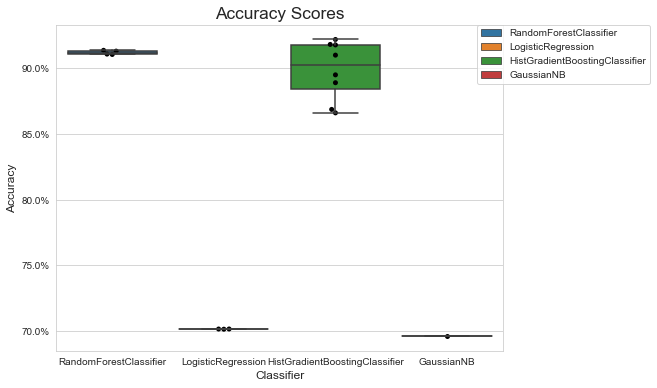

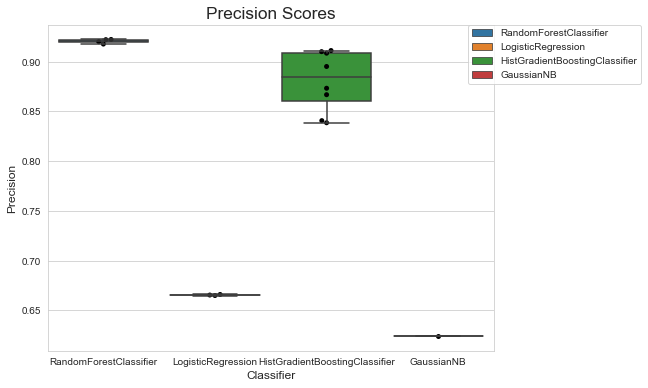

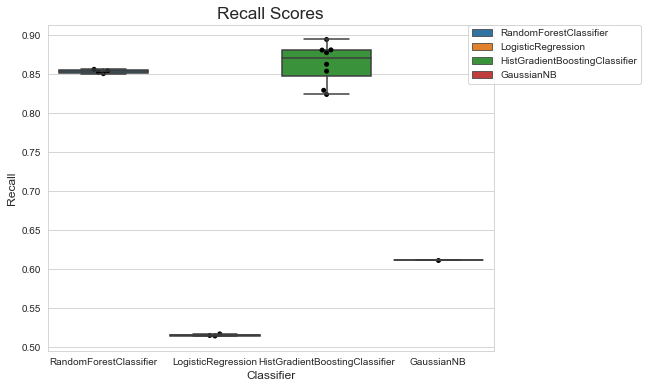

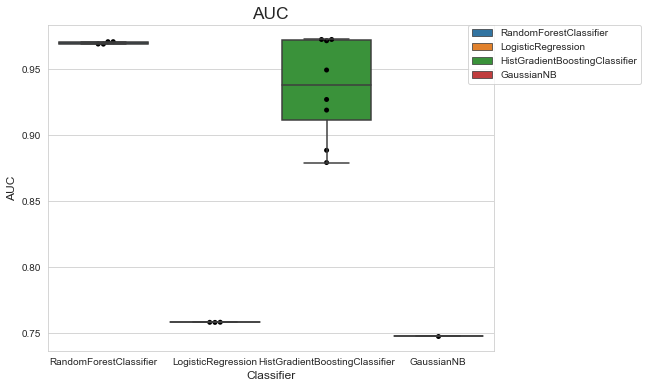

The highest mean accuracy was 92.16 % with the classifier/hyperparameter combination:

  HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.5,
                               loss='binary_crossentropy', max_bins=256,
                               max_depth=None, max_iter=200, max_leaf_nodes=31,
                               min_samples_leaf=40, n_iter_no_change=None,
                               random_state=11, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0)


The highest mean precision was 0.92 with the classifier/hyperparameter combination:

  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
          

In [44]:
#Define run function     
def run(a_clf, data, clf_hyper={}):
    M, L, n_folds = data 
    kf = StratifiedKFold(n_splits=n_folds) 
    ret = {} 
    
    for ids, (train_index, test_index) in enumerate(kf.split(M, L)):
        clf = a_clf(**clf_hyper) 
        clf.fit(M[train_index], L[train_index])
        pred = clf.predict(M[test_index])
        y_score = clf.predict_proba(M[test_index])[:,-1]
        mc_y = clf.predict_proba(M[test_index])
        if len(np.unique(L))==2:
            ret[ids]= {'clf': clf,
                       'train_index': train_index,
                       'test_index': test_index,
                       'accuracy': accuracy_score(L[test_index], pred),
                       'precision': precision_score(L[test_index], pred, average='binary'),
                       'recall': recall_score(L[test_index], pred, average='binary'),
                       'AUC': roc_auc_score(L[test_index], y_score)}
        else:
            ret[ids]= {'clf': clf,
                       'train_index': train_index,
                       'test_index': test_index,
                       'accuracy': accuracy_score(L[test_index], pred),
                       'precision': precision_score(L[test_index], pred, average='weighted'),
                       'recall': recall_score(L[test_index], pred, average='weighted'),
                       'AUC': roc_auc_score(L[test_index], mc_y, multi_class='ovr', labels=np.unique(L))}
    return ret

#Loop to generate all of the hyper permutations for the models
#https://stackoverflow.com/questions/209840/convert-two-lists-into-a-dictionary
hyper_combos = {}
for model in models:
    for k1, v1 in hypers.items():
        if k1 in str(model):
            hyper_combos[model] = [dict(zip(v1, x)) for x in product(*v1.values())]

            
#Run classifier/hyper combos
tmp = {} #temporary dict to store model and metrics 
metrics_dict = {} #Final dictionary we'll use to evaluate results

#Run all the model/parameter combos
for model in models:
    count = 0 #counter to keep track of number of how many permutaitons we're evalutating
    for i in hyper_combos[model]:
        tmp = run(model, data, i) #tmp will be replaced after each iteration
        count+=1
        for j in tmp: #pull model and accuracy to store in acc_dict
            #print(tmp[i])  #check
            #print(tmp[i]['accuracy'])  #check
            #print(tmp[i]['precision'])  #check
            #print(tmp[i]['recall'])  #check

            # The if function below won't recognize the clf if it's not a string, 
            # otherwise we get repeated clf/hyper combos
            clf_key = str(tmp[j]['clf']) 
            
            if clf_key not in metrics_dict:
                metrics_dict[clf_key] = {'accuracy': [tmp[j]['accuracy']],
                                    'precision': [tmp[j]['precision']],
                                    'recall': [tmp[j]['recall']],
                                    'AUC': [tmp[j]['AUC']]}
            else:
                metrics_dict[clf_key]['accuracy'].append(tmp[j]['accuracy']) 
                metrics_dict[clf_key]['precision'].append(tmp[j]['precision'])
                metrics_dict[clf_key]['recall'].append(tmp[j]['recall'])
                metrics_dict[clf_key]['AUC'].append(tmp[j]['AUC'])
        
        #Status updates
        print("   Evaluating: ", model)
        print("   Permutation: ", count,'\n')
        
        #compute the mean metrics for each of the permutaitons
        for k,v in metrics_dict.items():
            metrics_dict[k]['accuracy'] = np.mean(metrics_dict[k]['accuracy'])
            metrics_dict[k]['precision'] = np.mean(metrics_dict[k]['precision'])
            metrics_dict[k]['recall'] = np.mean(metrics_dict[k]['recall'])
            metrics_dict[k]['AUC'] = np.mean(metrics_dict[k]['AUC'])
            
            
#convert metrics into matrix
row_labels = [] #models with hypers
col_labels = [] #metric labels
metric_scores = [] #matrix meat

#Create col/row labels to keep track, fill the matrix and reshape
for k,v in metrics_dict.items():
    row_labels.append(k)
    for k2,v2 in v.items():
        metric_scores.append(v2)
        if k2 not in col_labels:
            col_labels.append(k2)
            
metrics_matrix = np.array(metric_scores)
metrics_matrix.shape = (len(row_labels), len(col_labels))

#broad labels for plot axes 
plot_labels=[]
for model in row_labels:
    for k in hypers.keys():
        if k in model:
            plot_labels.append(k)

#Plot accuracy results for each model
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x = plot_labels, y = metrics_matrix[:,0], hue=plot_labels, dodge=False)
sns.swarmplot(x=plot_labels, y=metrics_matrix[:,0], color='black', zorder=1)

plt.legend(bbox_to_anchor=(1.33,1), loc='upper right', borderaxespad=0.)
plt.xlabel('Classifier', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.title('Accuracy Scores', fontsize='xx-large')
ax.yaxis.set_major_formatter(PercentFormatter(1))
#plt.savefig('Accuracy.png') 
plt.show()


#Plot precision results for each model
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x = plot_labels, y = metrics_matrix[:,1], hue=plot_labels, dodge=False)
sns.swarmplot(x=plot_labels, y=metrics_matrix[:,1], color='black', zorder=1)

plt.legend(bbox_to_anchor=(1.33,1), loc='upper right', borderaxespad=0.)
plt.xlabel('Classifier', fontsize='large')
plt.ylabel('Precision', fontsize='large')
plt.title('Precision Scores', fontsize='xx-large')
#plt.savefig('Precision.png') 
plt.show()


#Plot recall results for each model
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x = plot_labels, y = metrics_matrix[:,2], hue=plot_labels, dodge=False)
sns.swarmplot(x=plot_labels, y=metrics_matrix[:,2], color='black', zorder=1)

plt.legend(bbox_to_anchor=(1.33,1), loc='upper right', borderaxespad=0.)
plt.xlabel('Classifier', fontsize='large')
plt.ylabel('Recall', fontsize='large')
plt.title('Recall Scores', fontsize='xx-large')
#plt.savefig('Recall.png') 
plt.show()


#Plot AUC results for each model
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.boxplot(x = plot_labels, y = metrics_matrix[:,3], hue=plot_labels, dodge=False)
sns.swarmplot(x=plot_labels, y=metrics_matrix[:,3], color='black', zorder=1)

plt.legend(bbox_to_anchor=(1.33,1), loc='upper right', borderaxespad=0.)
plt.xlabel('Classifier', fontsize='large')
plt.ylabel('AUC', fontsize='large')
plt.title('AUC', fontsize='xx-large')
#plt.savefig('Recall.png') 
plt.show()


#get row index of the top metrics
top_acc = np.argmax(metrics_matrix, axis=0)[0]
top_prec = np.argmax(metrics_matrix, axis=0)[1]
top_recall = np.argmax(metrics_matrix, axis=0)[2]
top_auc = np.argmax(metrics_matrix, axis=0)[3]


#Print top accuracy and CLF

print("The highest mean accuracy was",round(metrics_matrix[top_acc,0]*100,2),"%", "with the classifier/hyperparameter combination:\n\n ",row_labels[top_acc])

print("\n\nThe highest mean precision was",round(metrics_matrix[top_prec,1],2), "with the classifier/hyperparameter combination:\n\n ",row_labels[top_prec])

print("\n\nThe highest mean recall was",round(metrics_matrix[top_recall,2],2), "with the classifier/hyperparameter combination:\n\n ",row_labels[top_recall])

print("\n\nThe highest mean AUC was",round(metrics_matrix[top_auc,3],2), "with the classifier/hyperparameter combination:\n\n ",row_labels[top_auc])



In [45]:
#Put results into DF
base_df = pd.DataFrame(plot_labels, columns = ["Model"])
res_df = pd.DataFrame(metrics_matrix, columns = ["Accuracy", "Precision", "Recall", "AUC"])
results_cv = pd.concat([base_df, res_df], axis=1)

In [46]:
results_cv

,Model,Accuracy,Precision,Recall,AUC
0,RandomForestClassifier,0.910186,0.917766,0.852547,0.968641
1,RandomForestClassifier,0.910484,0.920152,0.850726,0.968720
2,RandomForestClassifier,0.913343,0.922207,0.856256,0.970508
3,RandomForestClassifier,0.912739,0.922384,0.854413,0.970495
4,LogisticRegression,0.701652,0.664846,0.516996,0.758430
5,LogisticRegression,0.701490,0.665329,0.515017,0.758369
6,LogisticRegression,0.701625,0.665897,0.514365,0.758305
7,HistGradientBoostingClassifier,0.868454,0.840743,0.829370,0.888399
8,HistGradientBoostingClassifier,0.865821,0.838617,0.824019,0.879144
9,HistGradientBoostingClassifier,0.888739,0.866845,0.853896,0.918793


Since false negatives are so expensive, we'll want to optimize for Recall.  GBC has the highest recall, but Random Forest has a larger AUC that we might be able to optimize.

In [47]:
row_labels[2]

"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',\n                       max_depth=None, max_features='auto', max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=5, min_samples_split=6,\n                       min_weight_fraction_leaf=0.0, n_estimators=100,\n                       n_jobs=None, oob_score=False, random_state=11, verbose=0,\n                       warm_start=False)"

In [48]:
#test GBC on the holdout set

clf_rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=6, n_estimators=50, n_jobs=-1, random_state=11)
clf_rf.fit(data_m_train, data_m_train_target)
pred_rf = clf_rf.predict(data_m_test)
y_score_rf = clf_rf.predict_proba(data_m_test)[:,-1]

print("Random Forest Results:\nAUC:", roc_auc_score(data_m_test_target, y_score_rf))
print("Recall:",  recall_score(data_m_test_target, pred_rf, average='binary'))
print("Precision:",  precision_score(data_m_test_target, pred_rf, average='binary'))

#clf_gbc = row_labels[2]

Random Forest Results:
AUC: 0.9701685236909092
Recall: 0.8558539655895929
Precision: 0.9201962664260335


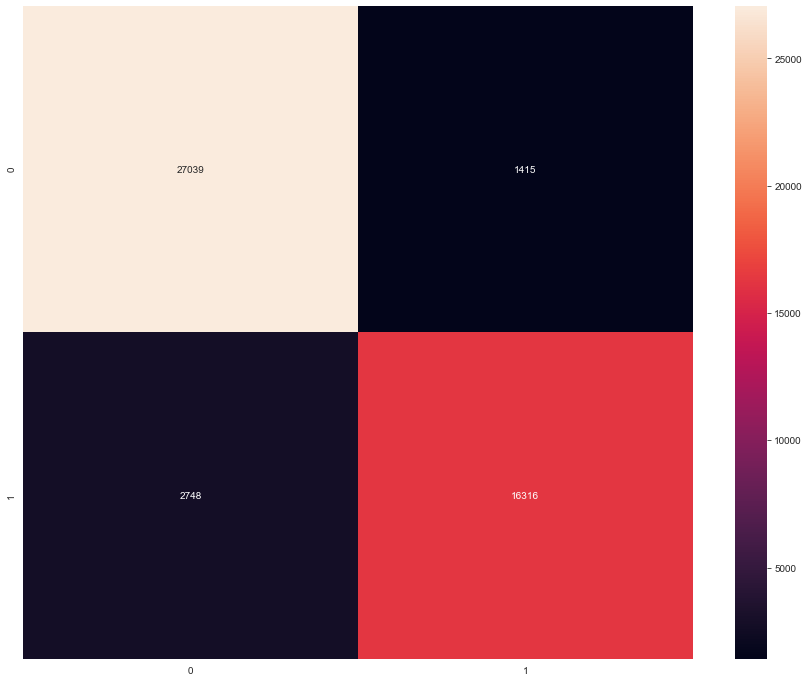

In [49]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(data_m_test_target, pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')

In [50]:
#Random Forest base cost:

cost = (500*cm_rf[1,0])+(10*cm_rf[0,1])
print("The per observation cost of the base random forest is $",round(cost/len(data_m_test),2))

The per observation cost of the base random forest is $ 29.21


<span source="color:blue">
    
### Random Forest: Optimize the Decision Threshold for Min Cost


In [51]:
#https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65

#Adjusting Threshold values to optimize for min cost
def adj_score(y_scores, thresh):
    return [1 if y >= thresh else 0 for y in y_scores]

In [52]:
from sklearn.metrics import precision_recall_curve

# get threshold array
p, r, thresholds = precision_recall_curve(data_m_test_target, y_score_rf)

#Loop through thresholds and calculate cost
cost_list = []

for i in thresholds:
    preds_adj_rf = adj_score(y_score_rf, i)
    cm = confusion_matrix(data_m_test_target, preds_adj_rf)
    cost = ((500*cm[1,0])+(10*cm[0,1]))/len(data_m_test)
    cost_list.append(cost)

Text(0, 0.5, 'Cost per Observation (in US $)')

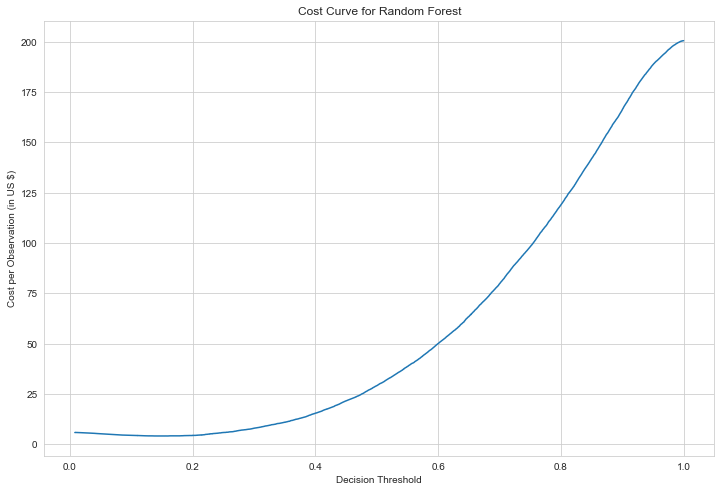

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x=thresholds, y=cost_list)
ax.set_title("Cost Curve for Random Forest")
ax.set_xlabel("Decision Threshold")
ax.set_ylabel("Cost per Observation (in US $)")

In [54]:
print("Minimum Cost per Observation (Random Forest): $",round(cost_list[np.argmin(cost_list)],2))
print("Minimum Total Cost (Random Forest): $",round(cost_list[np.argmin(cost_list)],2)*47518)
print("Decision Threshold:", thresholds[np.argmin(cost_list)])

Minimum Cost per Observation (Random Forest): $ 4.19
Minimum Total Cost (Random Forest): $ 199100.42
Decision Threshold: 0.14288513413182197


# Random Forest Optimized Results

In [55]:
y_preds_final_rf = adj_score(y_score_rf, thresholds[np.argmin(cost_list)])


cm_final = confusion_matrix(data_m_test_target, y_preds_final_rf)
print(cm_final,"\n\n")
print("Random Forest Results:\n\nAUC:", roc_auc_score(data_m_test_target, y_score_rf))
print("Recall:",  recall_score(data_m_test_target, y_preds_final_rf, average='binary'))
print("Precision:",  precision_score(data_m_test_target, y_preds_final_rf, average='binary'))

[[13875 14579]
 [  107 18957]] 


Random Forest Results:

AUC: 0.9701685236909092
Recall: 0.994387326898867
Precision: 0.5652731393129771


### HGBC: Optimize the Decision Threshold for Min Cost

In [56]:
#Base model (grid searched)
print(row_labels[12])

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.5,
                               loss='binary_crossentropy', max_bins=256,
                               max_depth=None, max_iter=200, max_leaf_nodes=31,
                               min_samples_leaf=40, n_iter_no_change=None,
                               random_state=11, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0)


In [58]:
#test GBC on the holdout set

clf_hgbc = HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.5,
                               loss='binary_crossentropy', max_bins=256,
                               max_depth=None, max_iter=200, max_leaf_nodes=31,
                               min_samples_leaf=40, n_iter_no_change=None,
                               random_state=11, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0)
clf_hgbc.fit(data_m_train, data_m_train_target)
pred_hgbc = clf_hgbc.predict(data_m_test)
y_score_hgbc = clf_hgbc.predict_proba(data_m_test)[:,-1]

print("Historgram Gradient Boosting Results:\nAUC:", roc_auc_score(data_m_test_target, y_score_hgbc))
print("Recall:",  recall_score(data_m_test_target, pred_hgbc, average='binary'))
print("Precision:",  precision_score(data_m_test_target, pred_hgbc, average='binary'))

Historgram Gradient Boosting Results:
AUC: 0.9623405606610944
Recall: 0.8959819555182543
Precision: 0.9070199660152931


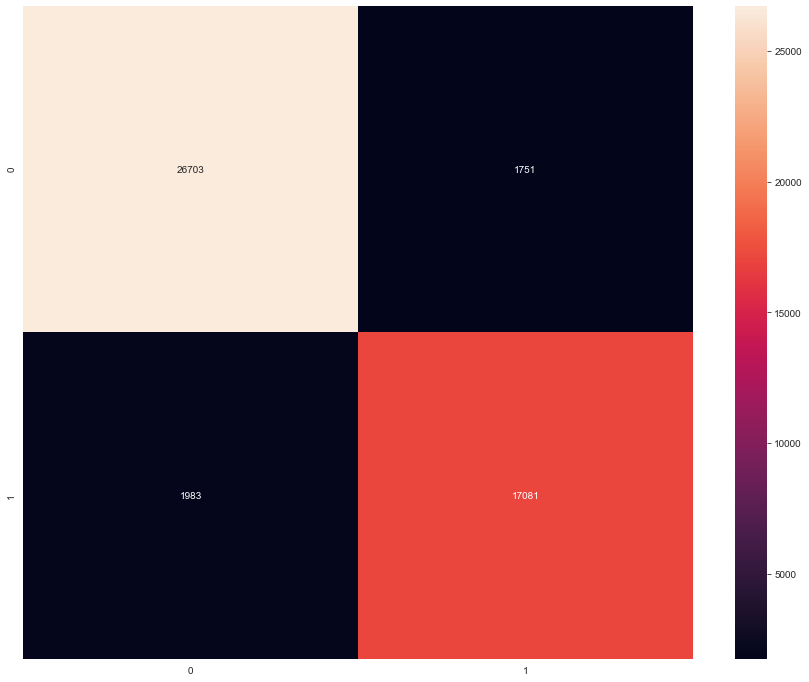

In [60]:
cm_hgbc = confusion_matrix(data_m_test_target, pred_hgbc)
sns.heatmap(cm_hgbc, annot=True, fmt='d')

In [61]:
#Gradient Boosting Classifier base cost:

cost = (500*cm_hgbc[1,0])+(10*cm_hgbc[0,1])
print("The per observation cost of the base Gradient Boosting Classifier is $",round(cost/len(data_m_test),2))

The per observation cost of the base Gradient Boosting Classifier is $ 21.23


In [65]:
# get threshold array
p, r, thresholds = precision_recall_curve(data_m_test_target, y_score_hgbc)

#Loop through thresholds and calculate cost
cost_list_hgbc = []

for i in thresholds:
    preds_adj_hgbc = adj_score(y_score_hgbc, i)
    cm = confusion_matrix(data_m_test_target, preds_adj_hgbc)
    cost = ((500*cm[1,0])+(10*cm[0,1]))/len(data_m_test)
    cost_list_hgbc.append(cost)

Text(0, 0.5, 'Cost per Observation (in US $)')

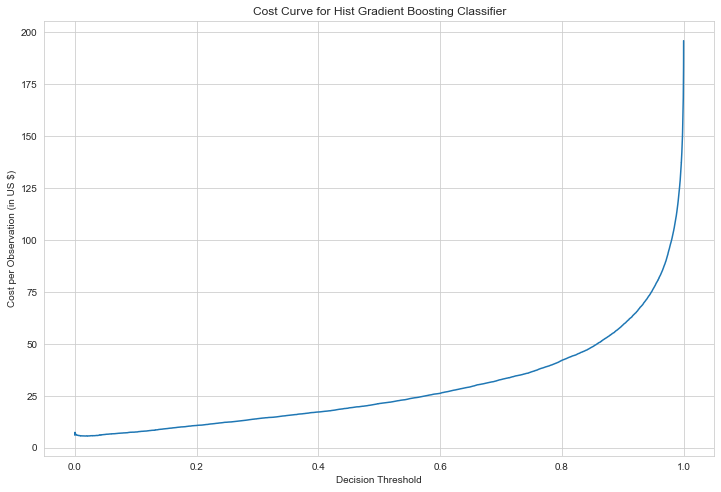

In [73]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x=thresholds, y=cost_list_hgbc)
ax.set_title("Cost Curve for Hist Gradient Boosting Classifier")
ax.set_xlabel("Decision Threshold")
ax.set_ylabel("Cost per Observation (in US $)")

In [74]:
print("Minimum Cost per Observation (Hist Gradient Boosting Classifier): $",round(cost_list_hgbc[np.argmin(cost_list_hgbc)],2))
print("Minimum Total Cost (Hist Gradient Boosting Classifier): $",round(cost_list_hgbc[np.argmin(cost_list_hgbc)],2)*47518)
print("Decision Threshold:", thresholds[np.argmin(cost_list_hgbc)])

Minimum Cost per Observation (Hist Gradient Boosting Classifier): $ 5.61
Minimum Total Cost (Hist Gradient Boosting Classifier): $ 266575.98000000004
Decision Threshold: 0.017270485285175524


In [75]:
y_preds_final_hgbc = adj_score(y_score_hgbc, thresholds[np.argmin(cost_list)])


cm_final = confusion_matrix(data_m_test_target, y_preds_final_hgbc)
print(cm_final,"\n\n")
print("Random Forest Results:\n\nAUC:", roc_auc_score(data_m_test_target, y_score_hgbc))
print("Recall:",  recall_score(data_m_test_target, y_preds_final_hgbc, average='binary'))
print("Precision:",  precision_score(data_m_test_target, y_preds_final_hgbc, average='binary'))

[[14746 13708]
 [  269 18795]] 


Random Forest Results:

AUC: 0.9623405606610944
Recall: 0.985889634913974
Precision: 0.578254314986309
